In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('C:\\Post Graduate Course in Data Analytics\\MACHINE LEARNING\\SVM\\petrol_consumption.csv')
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [5]:
df.shape

(48, 5)

In [6]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [7]:
df.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

(array([ 1.,  7.,  8., 15., 11.,  3.,  0.,  1.,  1.,  1.]),
 array([344. , 406.4, 468.8, 531.2, 593.6, 656. , 718.4, 780.8, 843.2,
        905.6, 968. ]),
 <BarContainer object of 10 artists>)

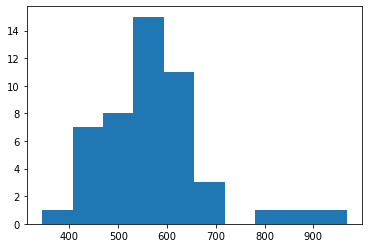

In [8]:
plt.hist(df.Petrol_Consumption)

<AxesSubplot:>

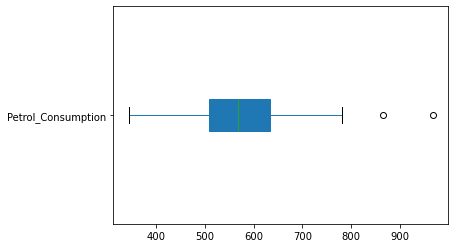

In [9]:
df['Petrol_Consumption'].plot.box(patch_artist=True,vert=False)

In [10]:
from scipy import stats

In [12]:
iqr_pc=stats.iqr(df['Petrol_Consumption'])
uplim_pc=df['Petrol_Consumption'].quantile(0.75)+(1.5*iqr_pc)
print(uplim_pc)
print(len(df[df['Petrol_Consumption']>uplim_pc]))

817.625
2


(array([ 1.,  0.,  1.,  1., 19.,  4., 10.,  3.,  8.,  1.]),
 array([ 5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]),
 <BarContainer object of 10 artists>)

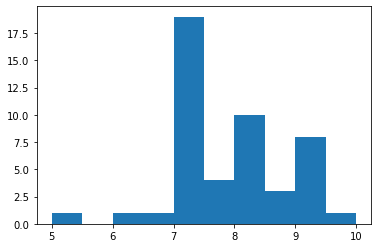

In [13]:
plt.hist(df['Petrol_tax'])

<AxesSubplot:>

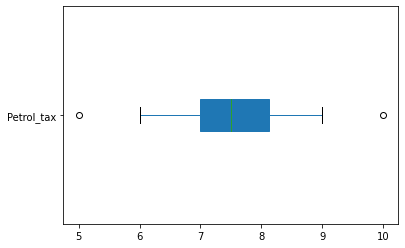

In [14]:
df['Petrol_tax'].plot.box(patch_artist=True,vert=False)

In [15]:
iqr_pt=stats.iqr(df['Petrol_tax'])
print(iqr_pt)
uplim_pt=df['Petrol_tax'].quantile(0.75)+(1.5*iqr_pt)
print(uplim_pt)
lowlim_pt=df['Petrol_tax'].quantile(0.25)-(1.5*iqr_pt)
print(lowlim_pt)
print(len(df[df['Petrol_tax']>uplim_pt]))
print(len(df[df['Petrol_tax']<lowlim_pt]))

1.125
9.8125
5.3125
1
1


In [21]:
df.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


(array([ 1.,  3.,  9.,  4.,  3., 11.,  6.,  3.,  3.,  5.]),
 array([3063. , 3290.9, 3518.8, 3746.7, 3974.6, 4202.5, 4430.4, 4658.3,
        4886.2, 5114.1, 5342. ]),
 <BarContainer object of 10 artists>)

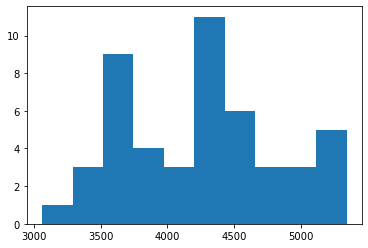

In [22]:
plt.hist(df['Average_income'])

<AxesSubplot:>

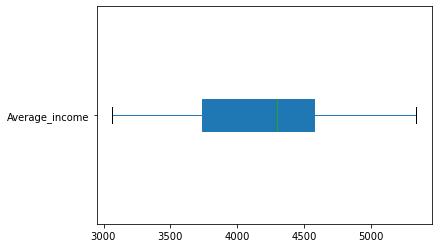

In [23]:
df['Average_income'].plot.box(patch_artist=True,vert=False)

(array([ 7.,  8., 11., 10.,  7.,  2.,  1.,  1.,  0.,  1.]),
 array([  431. ,  2166.1,  3901.2,  5636.3,  7371.4,  9106.5, 10841.6,
        12576.7, 14311.8, 16046.9, 17782. ]),
 <BarContainer object of 10 artists>)

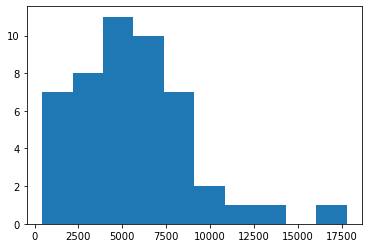

In [25]:
plt.hist(df['Paved_Highways'])

<AxesSubplot:>

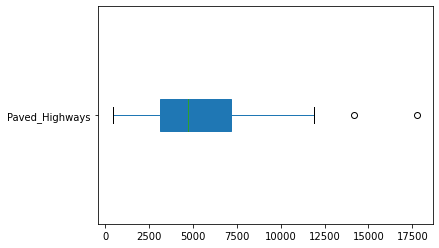

In [26]:
df['Paved_Highways'].plot.box(patch_artist=True,vert=False)

In [27]:
iqr_ph=stats.iqr(df['Paved_Highways'])
uplim_ph=df['Paved_Highways'].quantile(0.75)+(1.5*iqr_ph)
print(uplim_ph)
print(len(df[df['Paved_Highways']>uplim_ph]))

13224.625
2


(array([ 1.,  2., 10.,  9., 13.,  4.,  3.,  2.,  3.,  1.]),
 array([0.451 , 0.4783, 0.5056, 0.5329, 0.5602, 0.5875, 0.6148, 0.6421,
        0.6694, 0.6967, 0.724 ]),
 <BarContainer object of 10 artists>)

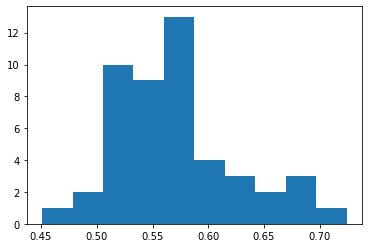

In [28]:
plt.hist(df['Population_Driver_licence(%)'])

<AxesSubplot:>

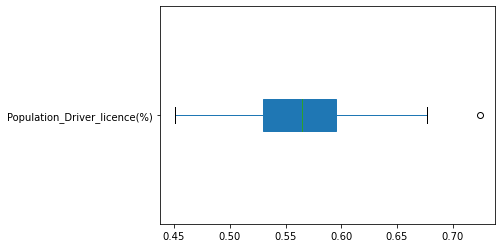

In [29]:
df['Population_Driver_licence(%)'].plot.box(patch_artist=True,vert=False)

In [30]:
iqr_pdl=stats.iqr(df['Population_Driver_licence(%)'])
uplim_pdl=df['Population_Driver_licence(%)'].quantile(0.75)+(1.5*iqr_pdl)
print(uplim_pdl)
print(len(df[df['Population_Driver_licence(%)']>uplim_pdl]))

0.6934999999999998
1


In [31]:
x=df.iloc[:,0:4]
y=df['Petrol_Consumption']
print(x.head())
print(y.head())

   Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)
0         9.0            3571            1976                         0.525
1         9.0            4092            1250                         0.572
2         9.0            3865            1586                         0.580
3         7.5            4870            2351                         0.529
4         8.0            4399             431                         0.544
0    541
1    524
2    561
3    414
4    410
Name: Petrol_Consumption, dtype: int64


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [34]:
from sklearn.svm import SVR

In [35]:
svr_rbf=SVR(kernel='rbf',C=1e3,gamma=0.1)
svr_lin=SVR(kernel='linear',C=1e3)

In [38]:
ytest

33    628
23    547
38    648
36    640
2     561
3     414
31    554
26    577
44    782
27    631
Name: Petrol_Consumption, dtype: int64

In [36]:
ypred1=svr_rbf.fit(xtrain,ytrain).predict(xtest)
ypred1

array([571.14210526, 571.14210526, 571.14210526, 571.14210526,
       571.14210526, 571.14210526, 571.14210526, 571.14210526,
       571.14210526, 571.14210526])

In [37]:
ypred2=svr_lin.fit(xtrain,ytrain).predict(xtest)
ypred2

array([ -488.38357617,  3599.26116107,  1388.55299304,  2657.64689563,
        1505.03986667, -1348.12069394,   -64.01958539,  1545.39490436,
       -4842.39172436,  2835.49182056])

In [41]:
from sklearn.metrics import mean_squared_error,r2_score

In [42]:
r2_score(ytest,ypred1)

-0.09116113582471463

In [43]:
r2_score(ytest,ypred2)

-708.62989381447

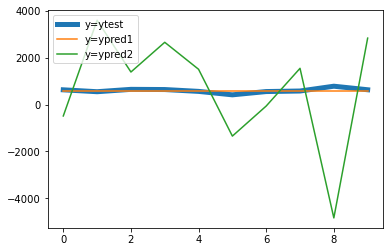

In [48]:
xaxis=np.arange(10)
plt.plot(xaxis,ytest,lw=5)
plt.plot(xaxis,ypred1)
plt.plot(xaxis,ypred2)
plt.legend(['y=ytest','y=ypred1','y=ypred2'],loc='upper left')
plt.show()